<a href="https://colab.research.google.com/github/ansehoon1999/hands-on_practice/blob/main/hands_on_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

순환 뉴런

- 각 타임 스텝마다 순환 뉴런은 물론 x와 이전 타임 스텝의 출력인 y를 입력으로 받음
- 첫 번째 타임 스텝에서는 이전 출력이 없으므로 일반적으로 0으로 설정함.
- 아래와 같이 오른쪽처럼 시간을 축으로 표현하여 펼칠 수 있는데 이를 **시간에 따라 네트워크를 펼쳤다** 라고 함.

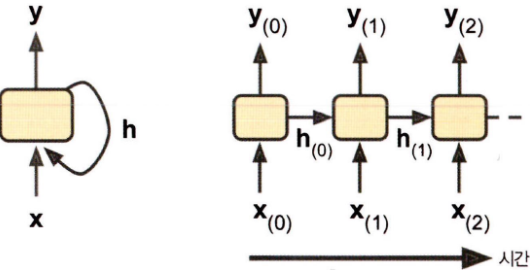

In [ ]:
import numpy as np

timesteps = 10
input_size = 4
hidden_size = 8

inputs = np.random.random((timesteps, input_size))
hidden_state_t = np.zeros((hidden_size,))
print(inputs)
print(hidden_state_t)

Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))



[[0.8495859  0.88401828 0.48537778 0.02222454]
 [0.04962635 0.24310541 0.1144617  0.69259906]
 [0.51499247 0.54914537 0.69895149 0.27140181]
 [0.66647625 0.07959183 0.17121138 0.62718425]
 [0.82999414 0.92136527 0.29529445 0.6567728 ]
 [0.39008899 0.98060501 0.51904266 0.08211817]
 [0.24886634 0.41348209 0.78806011 0.92276946]
 [0.8427839  0.76819323 0.63290798 0.18103519]
 [0.06154986 0.93789658 0.8949442  0.28798862]
 [0.12706107 0.74911573 0.98718917 0.53477877]]
[0. 0. 0. 0. 0. 0. 0. 0.]
(8, 4)
(8, 8)
(8,)


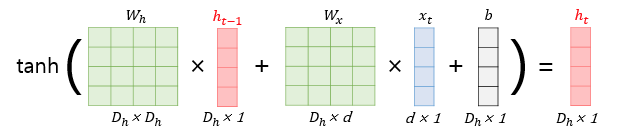

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.9999726  0.99996817 0.99993979 0.99999826 0.99977411 0.99997067
  0.99999911 0.99997916]
 [0.99993867 0.99994098 0.99976127 0.99999269 0.99891599 0.99990769
  0.99999536 0.99998674]
 [0.99996674 0.99997503 0.99993274 0.99999713 0.99971816 0.99997151
  0.99999823 0.99998414]
 [0.99995015 0.99994003 0.99977331 0.99999571 0.99932692 0.99994267
  0.99999786 0.99998617]
 [0.9999905  0.99998654 0.99993813 0.99999945 0.99980642 0.99998753
  0.99999972 0.99999142]
 [0.99996939 0.99997208 0.99994269 0.9999975  0.9997052  0.999963
  0.99999843 0.99998059]
 [0.99998551 0.99999131 0.99993993 0.99999858 0.99975456 0.99998819
  0.99999897 0.99999372]
 [0.99997814 0.99997837 0.99994732 0.99999857 0.9998119  0.9999803
  0.99999923 0.99998385]
 [0.9999782  0.99998815 0.99996484 0.9999978  0.99978118 0.99997997
  0.99999824 0.99998704]
 [0.99998367 0.99999185 0.99996526 0.99999836 0.99981261 0.99998726
  0.99999869 0.99999082]]


In [ ]:
import torch
import torch.nn as nn

input_size = 5
hidden_size = 8

inputs = torch.Tensor(1, 10, 5) #(batch_size, time_steps, input_size)
cell = nn.RNN(input_size, hidden_size, batch_first = True)
outputs, _status = cell(inputs)

print(outputs, _status)

tensor([[[-0.0924, -0.3200, -0.0330,  0.0835,  0.2585,  0.4109,  0.0457,
          -0.3007],
         [-0.0767, -0.3221, -0.3046,  0.4212,  0.2137,  0.3475,  0.1431,
          -0.3496],
         [ 0.0375, -0.1830, -0.2349,  0.4574,  0.1781,  0.3719,  0.2626,
          -0.3341],
         [ 0.0036, -0.1554, -0.1533,  0.3515,  0.1897,  0.3822,  0.2207,
          -0.3527],
         [-0.0091, -0.2076, -0.1720,  0.3428,  0.1967,  0.3905,  0.1756,
          -0.3516],
         [-0.0042, -0.2089, -0.2020,  0.3785,  0.1974,  0.3785,  0.1888,
          -0.3444],
         [ 0.0015, -0.1925, -0.1934,  0.3805,  0.1949,  0.3783,  0.2050,
          -0.3457],
         [-0.0011, -0.1924, -0.1840,  0.3684,  0.1946,  0.3818,  0.1997,
          -0.3482],
         [-0.0025, -0.1981, -0.1871,  0.3683,  0.1954,  0.3820,  0.1945,
          -0.3476],
         [-0.0017, -0.1978, -0.1902,  0.3723,  0.1955,  0.3807,  0.1965,
          -0.3468]]], grad_fn=<TransposeBackward1>) tensor([[[-0.0017, -0.1978, -0.1902,  

In [ ]:
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size=8, num_layers = 2, batch_first=True)
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


In [ ]:
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first= True, bidirectional=True)
outputs, _status = cell(inputs)
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


# LSTM

# attention mechanism

- 기존 seq2seq 한계는 고정된 크기로 압축해야합니다. 
- 디코더가 context vector를 매번 참고하면 이전의 한계점을 어느정도 해결할 수는 있음.

=> 해결방안: 매번 소스 문장에서의 출력 전부를 입력으로 받으면 됨
=> 디코더는 인코더의 모든 출력을 참고한다.  (에너지, 가중치)

# 트랜스포머

**Attention is All You Need (NIPS 2017) 실습**


In [ ]:
!pip install torchtext==0.6.0

     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 1.2MB 17.5MB/s 
  Found existing installation: torchtext 0.10.0
    Uninstalling torchtext-0.10.0:
      Successfully uninstalled torchtext-0.10.0


**데이터 전처리(Preprocessing)**

**spaCy 라이브러리**: 문장의 토큰화(tokenization), 태깅(tagging) 등의 전처리 기능을 위한 라이브러리

영어(Engilsh)와 독일어(Deutsch) 전처리 모듈 설치

In [ ]:
%%capture
!python -m spacy download en
!python -m spacy download de

In [ ]:
import spacy

spacy_en = spacy.load('en') # 영어 토큰화(tokenization)
spacy_de = spacy.load('de') # 독일어 토큰화(tokenization)

In [ ]:
tokenized = spacy_en.tokenizer("i am a graduate student.")
print(tokenized)

#반복문 사용 시 몇 번째 반복문인지 확인이 필요할 수 있습니다. 이때 사용합니다.
#인덱스 번호와 컬렉션의 원소를 tuple형태로 반환합니다.
for i, token in enumerate(tokenized) :
  print(f"인덱스 {i} : {token.text}")

i am a graduate student.
인덱스 0 : i
인덱스 1 : am
인덱스 2 : a
인덱스 3 : graduate
인덱스 4 : student
인덱스 5 : .


- 영어와 독일어 토큰화 함수 정의

In [ ]:
# 독일어(Deutsch) 문장을 토큰화 하는 함수 (순서를 뒤집지 않음)
def tokenize_de(text):
    return [token.text for token in spacy_de.tokenizer(text)]

# 영어(English) 문장을 토큰화 하는 함수
def tokenize_en(text):
    return [token.text for token in spacy_en.tokenizer(text)]

- 필드(field) 라이브러리를 이용해 데이터셋에 
- 대한 구체적인 전처리 내용을 명시합니다.
- Seq2Seq 모델과는 다르게 batch_first 속성의 값을 True로 설정합니다.
- 번역 목표
  - 소스(SRC): 독일어
  - 목표(TRG): 영어

In [ ]:
from torchtext.data import Field, BucketIterator

SRC = Field(tokenize=tokenize_de, init_token="<sos>", eos_token="<eos>", lower=True, batch_first=True)
TRG = Field(tokenize=tokenize_en, init_token="<sos>", eos_token="<eos>", lower=True, batch_first=True)

In [ ]:
from torchtext.datasets import Multi30k

train_dataset, valid_dataset, test_dataset = Multi30k.splits(exts=(".de", ".en"), fields=(SRC, TRG))

downloading training.tar.gz


training.tar.gz: 100%|██████████| 1.21M/1.21M [00:01<00:00, 962kB/s]


downloading validation.tar.gz


validation.tar.gz: 100%|██████████| 46.3k/46.3k [00:00<00:00, 165kB/s]


downloading mmt_task1_test2016.tar.gz


mmt_task1_test2016.tar.gz: 100%|██████████| 66.2k/66.2k [00:00<00:00, 158kB/s]


In [ ]:
print(f"학습 데이터셋(training dataset) 크기: {len(train_dataset.examples)}개")
print(f"평가 데이터셋(validation dataset) 크기: {len(valid_dataset.examples)}개")
print(f"테스트 데이터셋(testing dataset) 크기: {len(test_dataset.examples)}개")

학습 데이터셋(training dataset) 크기: 29000개
평가 데이터셋(validation dataset) 크기: 1014개
테스트 데이터셋(testing dataset) 크기: 1000개


In [ ]:
# 학습 데이터 중 하나를 선택해 출력
print(vars(train_dataset.examples[30])['src'])
print(vars(train_dataset.examples[30])['trg'])

['ein', 'mann', ',', 'der', 'mit', 'einer', 'tasse', 'kaffee', 'an', 'einem', 'urinal', 'steht', '.']
['a', 'man', 'standing', 'at', 'a', 'urinal', 'with', 'a', 'coffee', 'cup', '.']


In [ ]:
SRC.build_vocab(train_dataset, min_freq = 2)
TRG.build_vocab(train_dataset, min_freq = 2)

print(f"len(SRC): {len(SRC.vocab)}")
print(f"len(TRG): {len(TRG.vocab)}")

len(SRC): 7855
len(TRG): 5893


In [ ]:
print(TRG.vocab.stoi["abcabc"]) # 없는 단어: 0
print(TRG.vocab.stoi[TRG.pad_token]) # 패딩(padding): 1
print(TRG.vocab.stoi["<sos>"]) # <sos>: 2
print(TRG.vocab.stoi["<eos>"]) # <eos>: 3
print(TRG.vocab.stoi["hello"])
print(TRG.vocab.stoi["world"])

0
1
2
3
4112
1752


- 한 문장에 포함된 단어가 순서대로 나열된 상태로 네트워크에 입력되어야 함.
  - 하나의 배치에 포함된 문장들이 가지는 단어의 수가 유사할수록 좋음.
  - 이를 위해 BucketIterator 사용
  - **배치 크기는: 128**

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_dataset, valid_dataset, test_dataset),
    batch_size = BATCH_SIZE,
    device = device)


In [ ]:
for i, batch in enumerate(train_iterator):
    src = batch.src
    trg = batch.trg

    print(f"첫 번째 배치 크기: {src.shape}")

    # 현재 배치에 있는 하나의 문장에 포함된 정보 출력
    for i in range(src.shape[1]):
        print(f"인덱스 {i}: {src[0][i].item()}") # 여기에서는 [Seq_num, Seq_len]

    # 첫 번째 배치만 확인
    break

첫 번째 배치 크기: torch.Size([128, 25])
인덱스 0: 2
인덱스 1: 5
인덱스 2: 13
인덱스 3: 7
인덱스 4: 232
인덱스 5: 11
인덱스 6: 192
인덱스 7: 651
인덱스 8: 8
인덱스 9: 16
인덱스 10: 22
인덱스 11: 458
인덱스 12: 4
인덱스 13: 3
인덱스 14: 1
인덱스 15: 1
인덱스 16: 1
인덱스 17: 1
인덱스 18: 1
인덱스 19: 1
인덱스 20: 1
인덱스 21: 1
인덱스 22: 1
인덱스 23: 1
인덱스 24: 1


Multi Head Attention 구조
- 어텐션은 **세 가지 요소**로 입력을 받습니다.
  - 쿼리(queries)
  - 키(keys)
  - 값(values)
- 하이퍼 파라미터(hyperparameter)
  - hidden_dim: 하나의 단어에 대한 임베딩 차원
  - n_heads: gpemdml rotn
  - dropout_ratio: 드롭 아웃의 비율


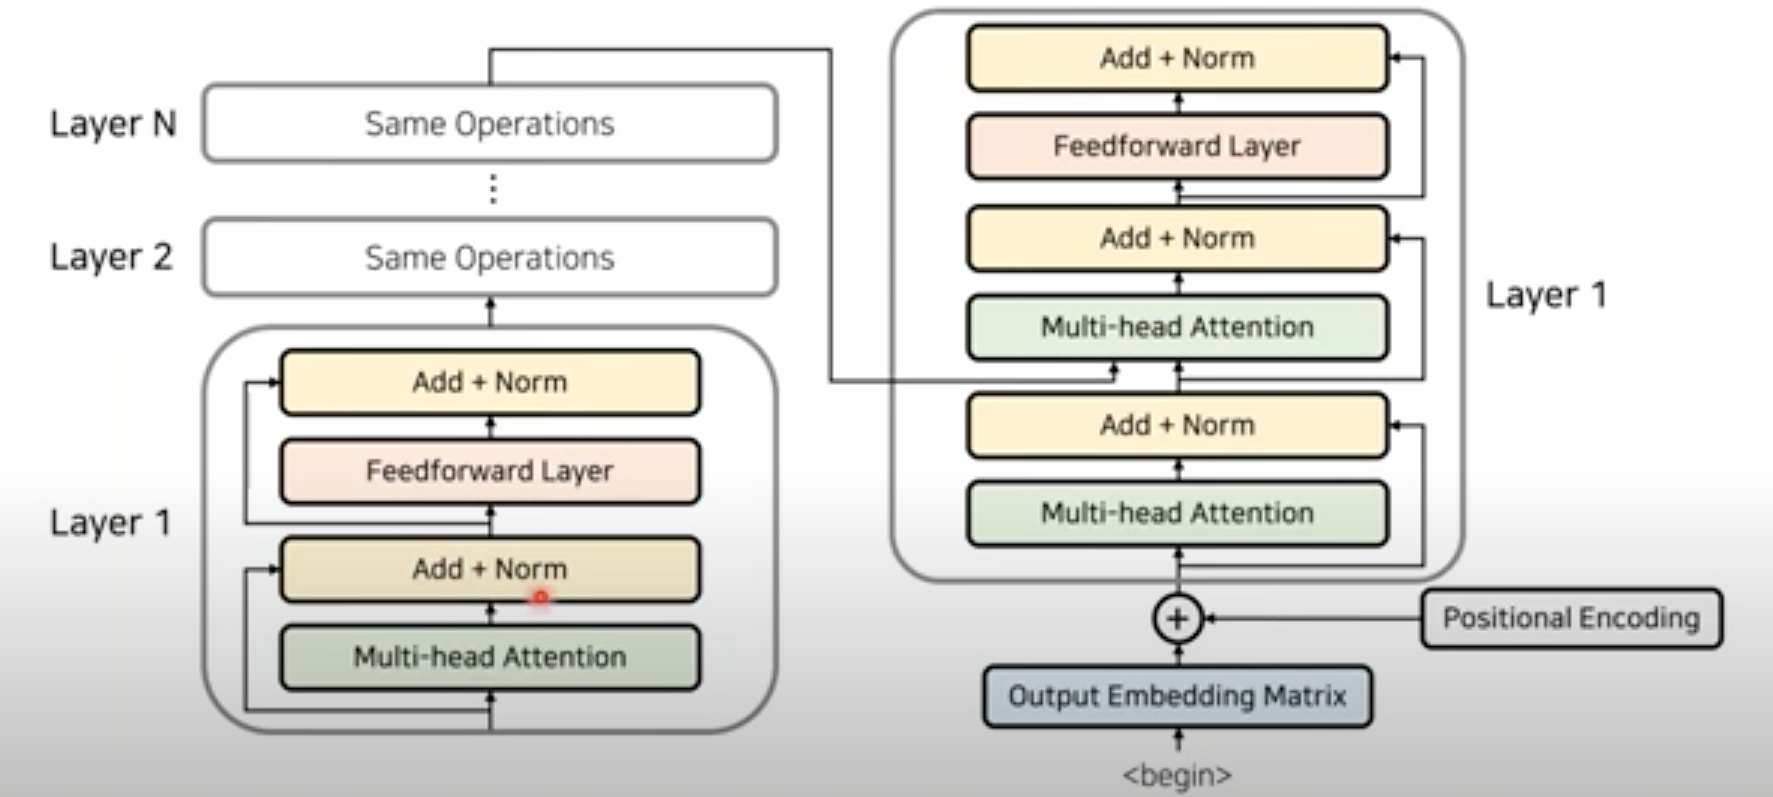

In [ ]:
import torch.nn as nn

class MultiHeadAttentionLayer(nn.Module) :
  def __init__(self, hidden_dim, n_heads, dropout_ratio, device) :
    super.__init__()

    assert hidden_dim % n_heads == 0

    self.hidden_dim = hidden_dim
    self.n_heads = n_heads
    self.head_dim = hidden_dim // n_heads

    self.fc_q = nn.Linear(hidden_dim, hidden_dim)
    self.fc_k = nn.Linear(hidden_dim, hidden_dim)
    self.fc_v = nn.Linear(hidden_dim, hidden_dim)

    self.fc_o = nn.Linear(hidden_dim, hidden_dim)
    self.dropout = nn.Dropout(droputout_ratio)
    self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

  def forward(self, query, key, value, mask = None) :
    batch_size = query.shape[0]
    
    Q = self.fc_q(query)
    K = self.fc_k(key)
    V = self.fc_v(value)

    energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
    if mask is not None:
      energy = energy.masked_fill(mask==0, -1e10) # 마스크(mask) 값이 0인 부분을 -1e10으로 채우기
    attention = torch.softmax(energy, dim = -1) # 어텐션(attention) 스코어 계산: 각 단어에 대한 확률 값
    x = torch.matmul(self.dropout(attention), V)  # 여기에서 Scaled Dot-Product Attention을 계산
    x = x.permute(0, 2, 1, 3).contiguous() # x: [batch_size, n_heads, query_len, head_dim]
    x = x.view(batch_size, -1, self.hidden_dim)  # x: [batch_size, query_len, n_heads, head_dim]
    x = self.fc_o(x)   #x: [batch_size, query_len, hidden_dim]
    return x, attention  #x: [batch_size, query_len, hidden_dim]

#### **Position-wise Feedforward 아키텍처**

* 입력과 출력의 차원이 동일합니다.
* 하이퍼 파라미터(hyperparameter)
    * **hidden_dim**: 하나의 단어에 대한 임베딩 차원
    * **pf_dim**: Feedforward 레이어에서의 내부 임베딩 차원
    * **dropout_ratio**: 드롭아웃(dropout) 비율

In [ ]:
class PositionwiseFeedLayer(nn.Module) :
  def __init__(self, hidden_dim, pf_dim, dropout_ratio) :
    super().__init__()

    self.fc_1 = nn.Linear(hidden_dim, pf_dim)
    self.fc_2 = nn.Linear(pf_dim, hidden_dim)

    self.dropout = nn.Dropout(dropout_ratio)


  def forward(self, x) :
    
    x = torch.relu(self.fc_1(x)) #x: [batch_size, seq_len, hidden_dim]
    x = self.dropout(x) #x: [batch_size, seq_len, pf_dim]
    x = self.fc_2(x)  #x: [batch_size, seq_len, hidden_dim]


#### **인코더(Encoder) 레이어 아키텍처**

* 하나의 인코더 레이어에 대해 정의합니다.
    * 입력과 출력의 차원이 같습니다.
    * 이러한 특징을 이용해 트랜스포머의 인코더는 인코더 레이어를 여러 번 중첩해 사용합니다.
* 하이퍼 파라미터(hyperparameter)
    * **hidden_dim**: 하나의 단어에 대한 임베딩 차원
    * **n_heads**: 헤드(head)의 개수 = scaled dot-product attention의 개수
    * **pf_dim**: Feedforward 레이어에서의 내부 임베딩 차원
    * **dropout_ratio**: 드롭아웃(dropout) 비율
* &lt;pad&gt; 토큰에 대하여 마스크(mask) 값을 0으로 설정합니다.

In [ ]:
class EncoderLayer(nn.Module) :
  def __init__(self, hidden, n_heads, pf_dim, dropout_ratio, device) :
    super().__init__()

    self.self_attn_layer_norm = nn.LayerNorm(hidden_dim)
    self.ff_layer_norm = nn.LayerNorm(hidden_dim)
    self.self_attention = MultiHeadAttentionLayer(hidden_dim, n_heads, dropout_ratio, device)
    self.positionwise_feedforward = positionwise_feedforward(hidden_dim, pf_dim, dropout_ratio) 
    self.dropout = nn.Droopout(dropout_ratio)
  def forward(self, src, src_mask) :
    _src, _ = self.self_attention(src, src, src, src_mask)
    src = self.self_attn_layer_norm(src + self.dropout(_src))
    _src = self.positionwise_feedforward(src)
    src = self.ff_layer_norm(src + self.dropout(_src))

    return src
  

In [ ]:
class Encoder(nn.Module) :
  def __init__(self, input_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length = 100) :
    super().__init__()

    self.device =device 
    self.tok_embedding =nn.Embedding(input_dim, hidden_dim)
    self.pos_embedding = nn.Embedding(max_length, hidden_dim)

    self.layers = nn.ModuleList([EncoderLayer(hidden_dim, n_heads, pf_dim, dropout_ratio,  device) for _ in range(n_layers)])
    self.dropout =nn.Dropout(dropout_ratio)

    self.scale = torch.sqrt(torch.FloatTensor([hidden_dim])).to(device)

  def forward(Self, src, src_masl) :

    batch_size = src.shape[0]
    src_len = src.shape[1]

    pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
    src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))

    for layer in self.layers : 
      src = layer(src, src_mask)

    return src

#### **디코더(Decoder) 레이어 아키텍처**

* 하나의 디코더 레이어에 대해 정의합니다.
    * 입력과 출력의 차원이 같습니다.
    * 이러한 특징을 이용해 트랜스포머의 디코더는 디코더 레이어를 여러 번 중첩해 사용합니다.
    * 디코더 레이어에서는 두 개의 Multi-Head Attention 레이어가 사용됩니다.
* 하이퍼 파라미터(hyperparameter)
    * **hidden_dim**: 하나의 단어에 대한 임베딩 차원
    * **n_heads**: 헤드(head)의 개수 = scaled dot-product attention의 개수
    * **pf_dim**: Feedforward 레이어에서의 내부 임베딩 차원
    * **dropout_ratio**: 드롭아웃(dropout) 비율
* 소스 문장의 &lt;pad&gt; 토큰에 대하여 마스크(mask) 값을 0으로 설정합니다.
* 타겟 문장에서 각 단어는 다음 단어가 무엇인지 알 수 없도록(이전 단어만 보도록) 만들기 위해 마스크를 사용합니다.

In [ ]:
class DecoderLayer(nn.Module) :
  def __init__(self, hidden_dim, n_heads, pf_dim, dropout_ratio, device) :
    super().__init__()

    self.self_attn_layer_norm = nn.LayerNorm(hidden_dim)
    self.enc_attn_layer_norm = nn.LayerNorm(hidden_dim)
    self.ff_layer_norm = nn.LayerNorm(hidden_dim)
    self.self_attention = MultiHeadAttentionLayer(hidden_dim, n_heads, dropout_ratio)
    self.encoder_attention = MultiHeadAttentionLayer(hidden_dim, pf_dim, dropout_ratio)
    self.positionwise_feedforward = PositionwiseFeedforwardLayer(hidden_dim, pf_dim, dropout_ratio)
    self.dropout = nn.Dropout(dropout_ratio)

  def forward(self, trg, enc_src, trg_mask, src_mask) :
    _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
    trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
    _trg, attention =self.encoder_attention(trg, enc_src, enc_src, src_mask)
    trg = self.enc_Attn_layer_norm(trg + self.dropout(_trg))

    _trg = self.positionwise_feedforward(trg)
    trg = self.ff_layer_norm(trg + self.dropout(_trg))

    return trg, attention

    



#### **디코더(Decoder) 아키텍처**

* 전체 디코더 아키텍처를 정의합니다.
* 하이퍼 파라미터(hyperparameter)
    * **output_dim**: 하나의 단어에 대한 원 핫 인코딩 차원
    * **hidden_dim**: 하나의 단어에 대한 임베딩 차원
    * **n_layers**: 내부적으로 사용할 인코더 레이어의 개수
    * **n_heads**: 헤드(head)의 개수 = scaled dot-product attention의 개수
    * **pf_dim**: Feedforward 레이어에서의 내부 임베딩 차원
    * **dropout_ratio**: 드롭아웃(dropout) 비율
    * **max_length**: 문장 내 최대 단어 개수
* 원본 논문과는 다르게 <b>위치 임베딩(positional embedding)을 학습</b>하는 형태로 구현합니다.
    * BERT와 같은 모던 트랜스포머 아키텍처에서 사용되는 방식입니다.
* Seq2Seq과는 마찬가지로 실제로 추론(inference) 시기에서는 디코더를 반복적으로 넣을 필요가 있습니다.
    * 학습(training) 시기에서는 한 번에 출력 문장을 구해 학습할 수 있습니다.
* 소스 문장의 &lt;pad&gt; 토큰에 대하여 마스크(mask) 값을 0으로 설정합니다.
* 타겟 문장에서 각 단어는 다음 단어가 무엇인지 알 수 없도록(이전 단어만 보도록) 만들기 위해 마스크를 사용합니다.

In [ ]:
class Decider(nn.Module) :
    def __init__(self, output_dim, hidden_dim, n_layers, n_heads, pf_dim, dropout_ratio, device, max_length=100):
        super().__init__()

        self.device =device
        self.tok_embedding = nn.Embedding(output_dim, hidden_dim)
        self.pos_embedding = nn.Embedding(max_length, hidden_dim)

        self.layers = nn.ModuleList([DecoderLayer(hidden_dim, n_heads, pf_dim, dropout_ratio, device) for _ in range(n_layers)])

        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_ratio)

        self.scale = torch.sqrt(torch.FloatTensor([hidden_dim])).to(device)

    def forward(self, trg, enc_src, trg_mask, src_mask) :
      batch_size = trg.shape[0]
      trg_len = trg.shape[1]

      pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
      trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))

      for layer in self.layers :
        trg, attention = layer(trg, enc_src, trg_mask, src_mask)

      output = self.fc_out(trg)
      return output, attention

      

#### **트랜스포머(Transformer) 아키텍처**

* 최종적인 전체 트랜스포머(Transformer) 모델을 정의합니다.
* 입력이 들어왔을 때 앞서 정의한 인코더와 디코더를 거쳐 출력 문장을 생성합니다.

In [ ]:
class Transformer(nn.Module) :
  def __init__(self, encoder, decoder, src_pad_idx, trg_pad_idx, device) :
    super().__init__()

    self.encoder = encoder 
    self.decoder = decoder
    self.src_pad_idx = src_pad_idx
    self.trg_pad_idx = trg_pad_idx
    self.device =device

  def make_src_mask(self, src) :
    src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
    return src_mask

  def make_trg_mask(self, trg):
    trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
    trg_mask = trg_pad_mask & trg_sub_mask # trg_sub_mask: [trg_len, trg_len]
    return trg_mask # trg_mask: [batch_size, 1, trg_len, trg_len]

  def forward(self, src, trg):

    src_mask = self.make_src_mask(src) # src: [batch_size, src_len]
    trg_mask = self.make_trg_mask(trg) # trg: [batch_size, trg_len]

        # src_mask: [batch_size, 1, 1, src_len]
        # trg_mask: [batch_size, 1, trg_len, trg_len]

    enc_src = self.encoder(src, src_mask)

        # enc_src: [batch_size, src_len, hidden_dim]

    output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)

        # output: [batch_size, trg_len, output_dim]
        # attention: [batch_size, n_heads, trg_len, src_len]

    return output, attention  

    

#### **학습(Training)**

* 하이퍼 파라미터 설정 및 모델 초기화

In [ ]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
HIDDEN_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

# 인코더(encoder)와 디코더(decoder) 객체 선언
enc = Encoder(INPUT_DIM, HIDDEN_DIM, ENC_LAYERS, ENC_HEADS, ENC_PF_DIM, ENC_DROPOUT, device)
dec = Decoder(OUTPUT_DIM, HIDDEN_DIM, DEC_LAYERS, DEC_HEADS, DEC_PF_DIM, DEC_DROPOUT, device)

# Transformer 객체 선언
model = Transformer(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')


In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

model.apply(initialize_weights)

* 학습 및 평가 함수 정의
    * 기본적인 Seq2Seq 모델과 거의 유사하게 작성할 수 있습니다.

In [ ]:
import torch.optim as optim

LEARNING_RATE = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)


In [ ]:
def train(model, iterator, optimizer, criterion, clip) :
  model.train()
  epoch_loss = 0

  for i, batch in enumerate(iterator) :
    src = batch.src
    trg = batch.trg

    optimier.zero_grad()

    output, _ = model(src, trg[:,:-1])

    output_dim = output.shape[-1]
    output = output.contiguous().view(-1, output_dim)
    trg = trg[:,1:].contiguous().view(-1)

    loss = criterion(output, trg)
    loss.backward()

    torch.nn.utils.clip_grad_nrom(model.parameters(), clip)

    optimizer.step()
    epoch_loss +=loss.item()

  return epoch_loss / len(iterator)

# 모델 평가(evaluate) 함수
def evaluate(model, iterator, criterion):
    model.eval() # 평가 모드
    epoch_loss = 0

    with torch.no_grad():
        # 전체 평가 데이터를 확인하며
        for i, batch in enumerate(iterator):
            src = batch.src
            trg = batch.trg

            # 출력 단어의 마지막 인덱스(<eos>)는 제외
            # 입력을 할 때는 <sos>부터 시작하도록 처리
            output, _ = model(src, trg[:,:-1])

            # output: [배치 크기, trg_len - 1, output_dim]
            # trg: [배치 크기, trg_len]

            output_dim = output.shape[-1]

            output = output.contiguous().view(-1, output_dim)
            # 출력 단어의 인덱스 0(<sos>)은 제외
            trg = trg[:,1:].contiguous().view(-1)

            # output: [배치 크기 * trg_len - 1, output_dim]
            # trg: [배치 크기 * trg len - 1]

            # 모델의 출력 결과와 타겟 문장을 비교하여 손실 계산
            loss = criterion(output, trg)

            # 전체 손실 값 계산
            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

In [ ]:
import math
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [ ]:

import time
import math
import random

N_EPOCHS = 10
CLIP = 1
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time() # 시작 시간 기록

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    end_time = time.time() # 종료 시간 기록
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'transformer_german_to_english.pt')

    print(f'Epoch: {epoch + 1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):.3f}')
    print(f'\tValidation Loss: {valid_loss:.3f} | Validation PPL: {math.exp(valid_loss):.3f}')